In [ ]:
## Notebook env: brian_script_env (R kernel)

In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggforce))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))

In [2]:
## load TCGA breast data
path_orig = '/home/ssobti/projects/heterogeneity_brian/output_data/TCGA_nb_analysis/nb_pause_points/TCGA_breast_q25_q75_original/'
load(paste0(path_orig, 'gped_clean_df_CV_ratio_q25_q75.RData'))
TCGA_CV_ratios = grouped_dataframes_list_with_CV_ratio_cleaned

## load single cell data
variant = 'CV_gene_median_aboveorequalto1_normalized_mtx_cc_regressed_'
CRISPRi_CV_ratios = readRDS(paste0('/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRi_CRISPRa_cell_culture_screen/heterogeneity/', variant, 'CV_ratios.rds'))
CRISPRa_CV_ratios = readRDS(paste0('/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRa_second_repeat_screen_deep_sequenced/heterogeneity/', variant, 'CV_ratios.rds'))

In [3]:
names(TCGA_CV_ratios) = sapply(TCGA_CV_ratios, '[[', 1)

## find intersecting genes
intersecting_genes_RNF8 = intersect(intersect(TCGA_CV_ratios[['RNF8']][[3]]$Hugo_Symbol, CRISPRi_CV_ratios[['RNF8']]$gene), CRISPRa_CV_ratios[['RNF8']]$gene)
intersecting_genes_MIS18A = intersect(intersect(TCGA_CV_ratios[['MIS18A']][[3]]$Hugo_Symbol, CRISPRi_CV_ratios[['MIS18A']]$gene), CRISPRa_CV_ratios[['MIS18A']]$gene)x

## RNF8
RNF8_CV_ratios = data.frame(genes = intersecting_genes_RNF8, TCGA = 1/TCGA_CV_ratios[['RNF8']][[3]][match(intersecting_genes_RNF8, TCGA_CV_ratios[['RNF8']][[3]]$Hugo_Symbol),'CV_ratio'], ## q25 to q75 ratio --> flip it to make q75 to q25
CRISPRi = 1/CRISPRi_CV_ratios[['RNF8']][match(intersecting_genes_RNF8, CRISPRi_CV_ratios[['RNF8']]$gene),'CV_gdCV_ctrlratio'], ## resembles q25 to q75 ratio --> flip it
CRISPRa = CRISPRa_CV_ratios[['RNF8']][match(intersecting_genes_RNF8, CRISPRa_CV_ratios[['RNF8']]$gene),'CV_gdCV_ctrlratio']) ## resembles q75 to q25 ratio

## MIS18A
MIS18A_CV_ratios = data.frame(genes = intersecting_genes_MIS18A, TCGA = 1/TCGA_CV_ratios[['MIS18A']][[3]][match(intersecting_genes_MIS18A, TCGA_CV_ratios[['MIS18A']][[3]]$Hugo_Symbol),'CV_ratio'], ## q25 to q75 ratio --> flip it to make q75 to q25
CRISPRi = 1/CRISPRi_CV_ratios[['MIS18A']][match(intersecting_genes_MIS18A, CRISPRi_CV_ratios[['MIS18A']]$gene),'CV_gdCV_ctrlratio'], ## resembles q25 to q75 ratio --> flip it
CRISPRa = CRISPRa_CV_ratios[['MIS18A']][match(intersecting_genes_MIS18A, CRISPRa_CV_ratios[['MIS18A']]$gene),'CV_gdCV_ctrlratio']) ## resembles q75 to q25 ratio

In [4]:
## save CV data for RNF8 and MIS18A for Hamed
RNF8_q25_q75_TCGA_CVs = TCGA_CV_ratios[['RNF8']][c(3,4)]
RNF8_CRISPRi_to_control_CVs = CRISPRi_CV_ratios[['RNF8']]
RNF8_CRISPRa_to_control_CVs = CRISPRa_CV_ratios[['RNF8']]

MIS18A_q25_q75_TCGA_CVs = TCGA_CV_ratios[['MIS18A']][c(3,4)]
MIS18A_CRISPRi_to_control_CVs = CRISPRi_CV_ratios[['MIS18A']]
MIS18A_CRISPRa_to_control_CVs = CRISPRa_CV_ratios[['MIS18A']]

names(RNF8_q25_q75_TCGA_CVs) = c('q25', 'q75')
names(MIS18A_q25_q75_TCGA_CVs) = c('q25', 'q75')
# save(intersecting_genes_RNF8, intersecting_genes_MIS18A, RNF8_q25_q75_TCGA_CVs, RNF8_CRISPRi_to_control_CVs, RNF8_CRISPRa_to_control_CVs, MIS18A_q25_q75_TCGA_CVs, MIS18A_CRISPRi_to_control_CVs, MIS18A_CRISPRa_to_control_CVs, file = '/home/ssobti/projects/heterogeneity_brian/notebooks/TCGA_breast_analysis/RNF8_MIS18A_CV_ratios.RData')

## Correlation Plots of CV ratios ##

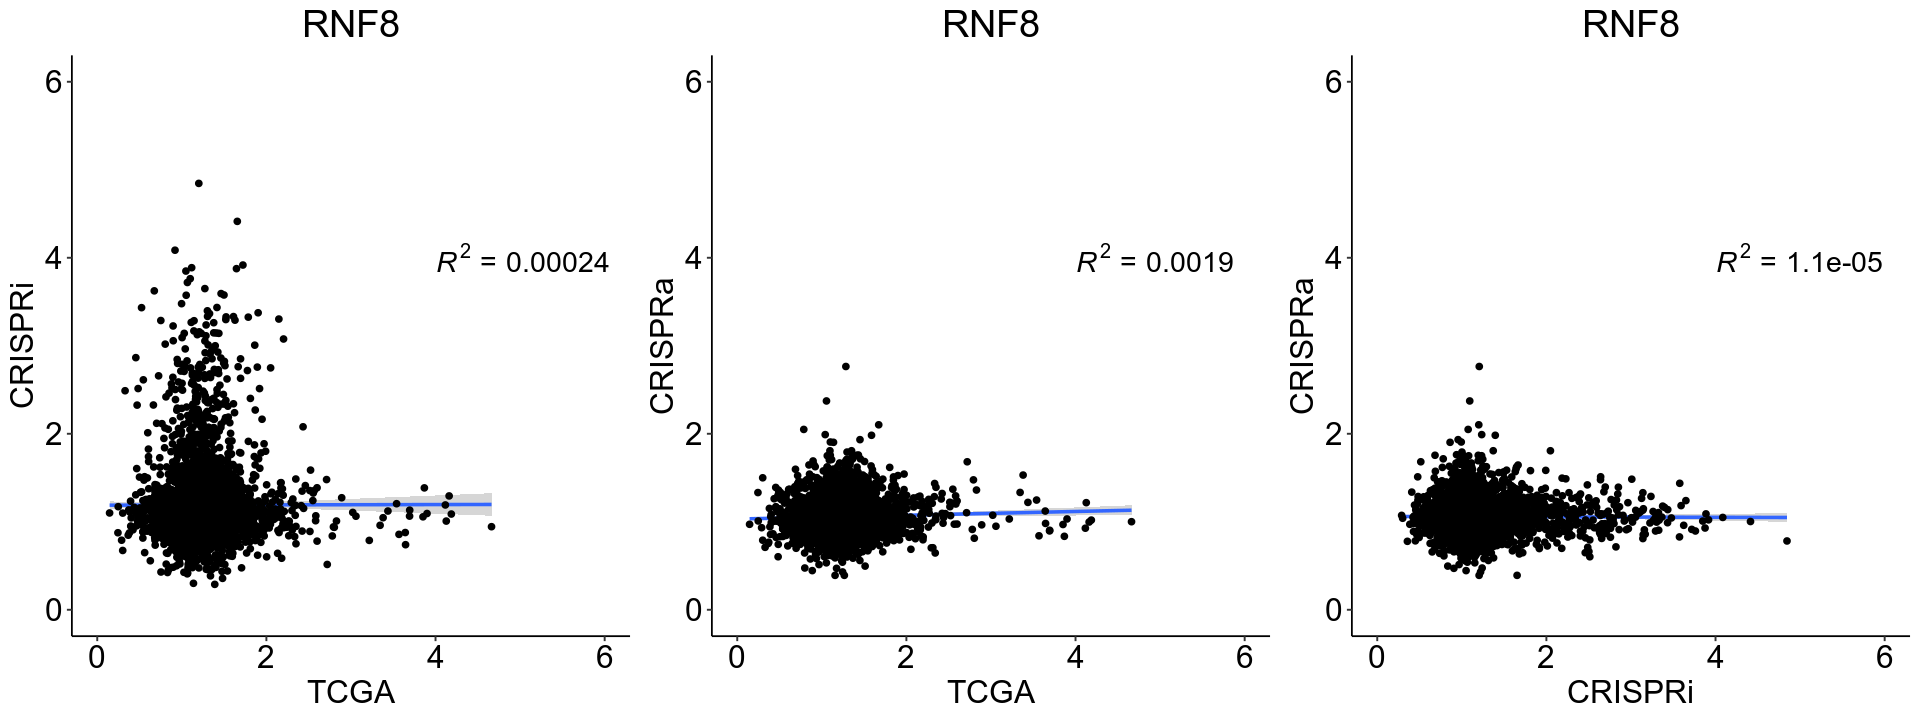

In [7]:
options(repr.plot.width = 16, repr.plot.height = 6)
RNF8_TCGA_CRISPRi = RNF8_CV_ratios %>% select(-genes, - CRISPRa) %>% ggplot(aes(x = TCGA, y = CRISPRi)) + geom_smooth(method = "lm", formula = y ~ x) + geom_point() +
    stat_cor(aes(label = ..rr.label..), label.y = 4, label.x = 4, size = 6, method = 'spearman') + ylim(c(0, 6)) + xlim(c(0, 6)) + theme_pubr() + 
    theme(text = element_text(size = 19), plot.title = element_text(hjust = 0.5)) + ggtitle('RNF8')

RNF8_TCGA_CRISPRa = RNF8_CV_ratios %>% select(-genes, - CRISPRi) %>% ggplot(aes(x = TCGA, y = CRISPRa)) + geom_smooth(method = "lm", formula = y ~ x) + geom_point() +
    stat_cor(aes(label = ..rr.label..), label.y = 4, label.x = 4, size = 6, method = 'spearman') + ylim(c(0, 6)) + xlim(c(0, 6)) + theme_pubr() + 
    theme(text = element_text(size = 19), plot.title = element_text(hjust = 0.5)) + ggtitle('RNF8')

RNF8_CRISPRi_CRISPRa = RNF8_CV_ratios %>% select(-genes, - TCGA) %>% ggplot(aes(x = CRISPRi, y = CRISPRa)) + geom_smooth(method = "lm", formula = y ~ x) + geom_point() +
    stat_cor(aes(label = ..rr.label..), label.y = 4, label.x = 4, size = 6, method = 'spearman') + ylim(c(0, 6)) + xlim(c(0, 6)) + theme_pubr() + 
    theme(text = element_text(size = 19), plot.title = element_text(hjust = 0.5)) + ggtitle('RNF8')

ggarrange(RNF8_TCGA_CRISPRi, RNF8_TCGA_CRISPRa, RNF8_CRISPRi_CRISPRa, nrow = 1)

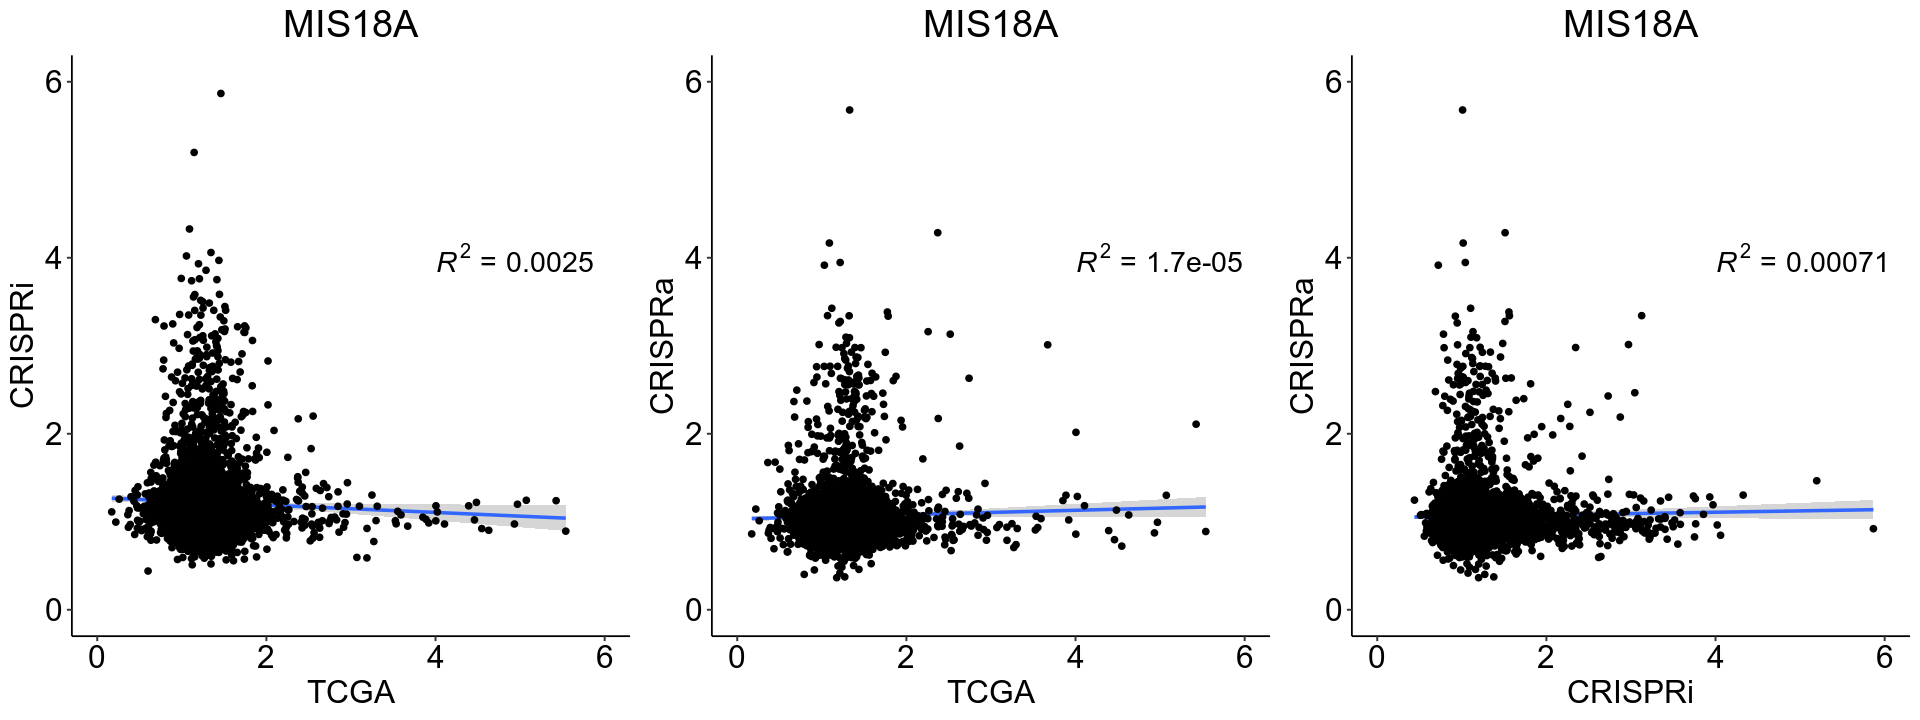

In [8]:
options(repr.plot.width = 16, repr.plot.height = 6)
MIS18A_TCGA_CRISPRi = MIS18A_CV_ratios %>% select(-genes, - CRISPRa) %>% ggplot(aes(x = TCGA, y = CRISPRi)) + geom_smooth(method = "lm", formula = y ~ x) + geom_point() +
    stat_cor(aes(label = ..rr.label..), label.y = 4, label.x = 4, size = 6, method = 'spearman') + ylim(c(0, 6)) + xlim(c(0, 6)) + theme_pubr() + 
    theme(text = element_text(size = 19), plot.title = element_text(hjust = 0.5)) + ggtitle('MIS18A')

MIS18A_TCGA_CRISPRa = MIS18A_CV_ratios %>% select(-genes, - CRISPRi) %>% ggplot(aes(x = TCGA, y = CRISPRa)) + geom_smooth(method = "lm", formula = y ~ x) + geom_point() +
    stat_cor(aes(label = ..rr.label..), label.y = 4, label.x = 4, size = 6, method = 'spearman') + ylim(c(0, 6)) + xlim(c(0, 6)) + theme_pubr() + 
    theme(text = element_text(size = 19), plot.title = element_text(hjust = 0.5)) + ggtitle('MIS18A')

MIS18A_CRISPRi_CRISPRa = MIS18A_CV_ratios %>% select(-genes, - TCGA) %>% ggplot(aes(x = CRISPRi, y = CRISPRa)) + geom_smooth(method = "lm", formula = y ~ x) + geom_point() +
    stat_cor(aes(label = ..rr.label..), label.y = 4, label.x = 4, size = 6, method = 'spearman') + ylim(c(0, 6)) + xlim(c(0, 6)) + theme_pubr() + 
    theme(text = element_text(size = 19), plot.title = element_text(hjust = 0.5)) + ggtitle('MIS18A')

suppressWarnings(ggarrange(MIS18A_TCGA_CRISPRi, MIS18A_TCGA_CRISPRa, MIS18A_CRISPRi_CRISPRa, nrow = 1))